# Energy Consumption Prediction

## 1. Importing Libraries

In [1]:
import math

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2. Loading the Dataset

In [2]:
df = pd.read_csv("energy_data.csv")

In [3]:
df.sample(5)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
670,Commercial,22063,92,8,33.62,Weekend,4015.07
180,Commercial,13761,3,28,31.36,Weekday,3171.27
771,Industrial,26515,45,25,33.47,Weekday,4658.38
245,Residential,15096,16,11,10.88,Weekend,2580.42
505,Residential,48790,58,38,28.79,Weekday,5185.54


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [5]:
df["Building Type"].value_counts()

Building Type
Residential    347
Commercial     336
Industrial     317
Name: count, dtype: int64

In [6]:
df["Day of Week"].value_counts()

Day of Week
Weekday    507
Weekend    493
Name: count, dtype: int64

In [7]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.duplicated().sum()

0

## 3. Exploratory Data Analysis (EDA)

#### Pie chart of building types

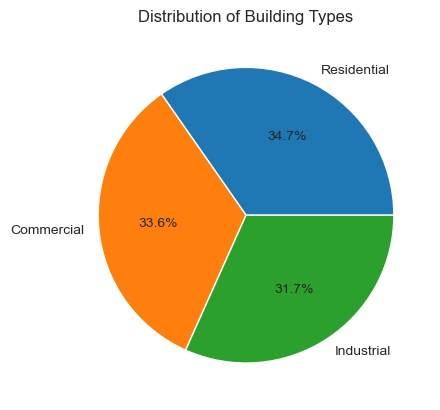

In [196]:
plt.pie(df["Building Type"].value_counts(), labels=df["Building Type"].value_counts().index, autopct="%1.1f%%")
plt.title("Distribution of Building Types")
plt.show()

#### Distribution of energy consumption

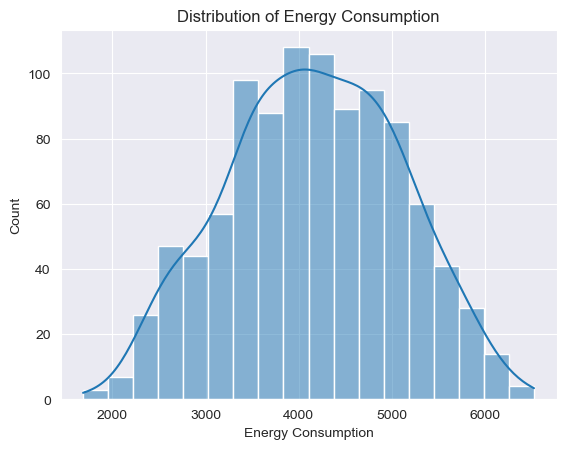

In [197]:
sns.histplot(data=df, x="Energy Consumption", kde=True)
plt.title("Distribution of Energy Consumption")
plt.show()

#### Energy consumption based on temperature

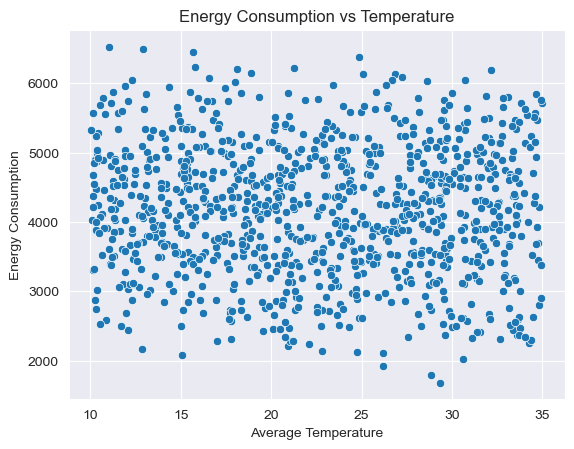

In [198]:
sns.scatterplot(data=df, x="Average Temperature", y="Energy Consumption")
plt.title("Energy Consumption vs Temperature")
plt.show()

#### Average energy consumption by building type

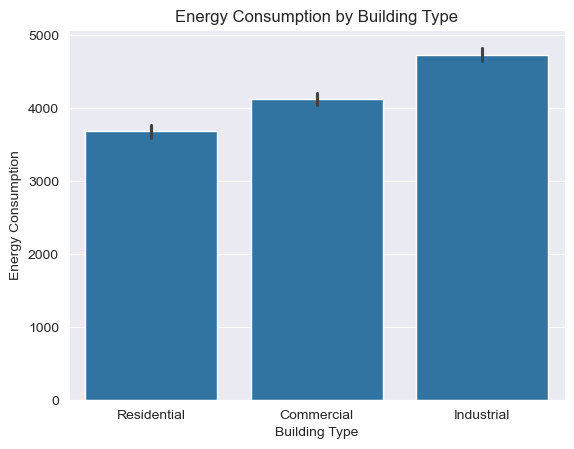

In [199]:
sns.barplot(data=df, x="Building Type", y="Energy Consumption")
plt.title("Energy Consumption by Building Type")
plt.show()

#### Number of occupants vs energy consumption

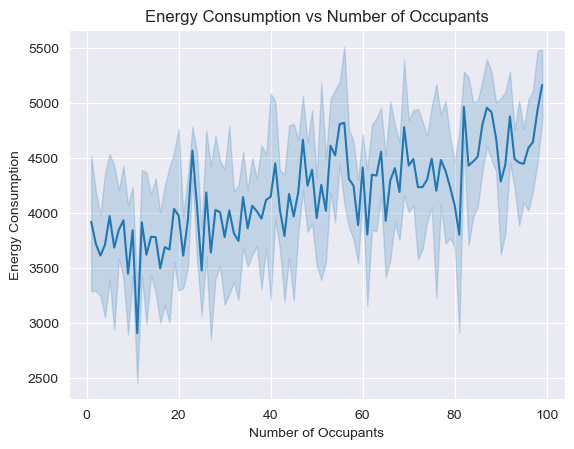

In [200]:
sns.lineplot(data=df, x="Number of Occupants", y="Energy Consumption")
plt.title("Energy Consumption vs Number of Occupants")
plt.show()

#### Energy consumption by area

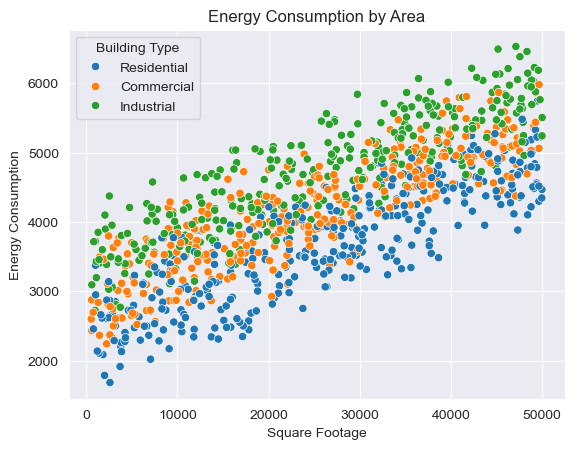

In [201]:
sns.scatterplot(data=df, x="Square Footage", y="Energy Consumption", hue="Building Type")
plt.title("Energy Consumption by Area")
plt.show()

#### Boxplot of energy consumption by building type

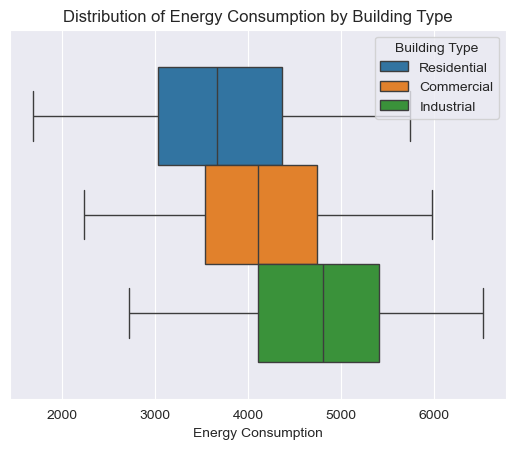

In [202]:
sns.boxplot(data=df, x="Energy Consumption", hue="Building Type")
plt.title("Distribution of Energy Consumption by Building Type")
plt.show()

#### Appliances vs energy consumption

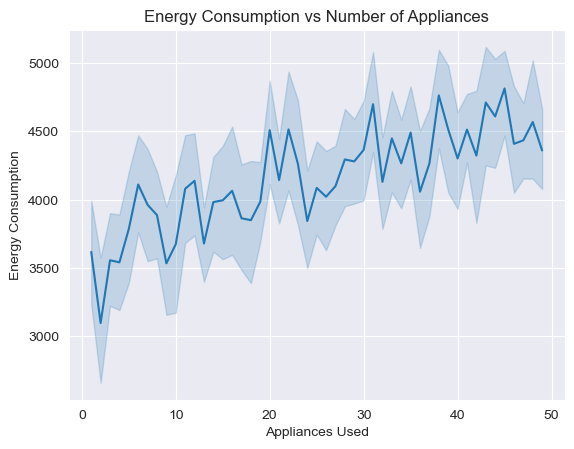

In [203]:
sns.lineplot(data=df, x="Appliances Used", y="Energy Consumption")
plt.title("Energy Consumption vs Number of Appliances")
plt.show()

#### Energy consumption for each building type by day of week

In [204]:
df.groupby(["Day of Week", "Building Type"])["Energy Consumption"].mean()


Day of Week  Building Type
Weekday      Commercial       4116.690479
             Industrial       4747.906624
             Residential      3723.662022
Weekend      Commercial       4143.198876
             Industrial       4722.617938
             Residential      3634.721280
Name: Energy Consumption, dtype: float64

## 4. Data Preprocessing

#### Missing Values

In [205]:
df.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

#### Outliers

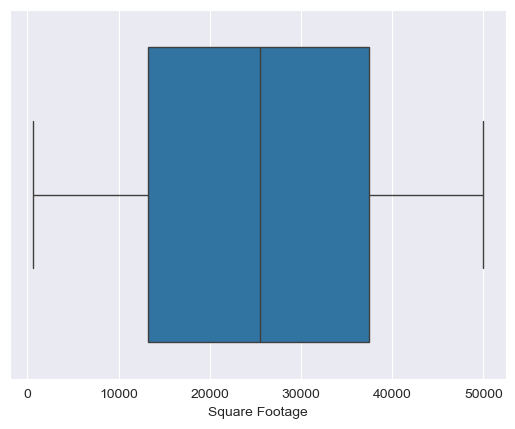

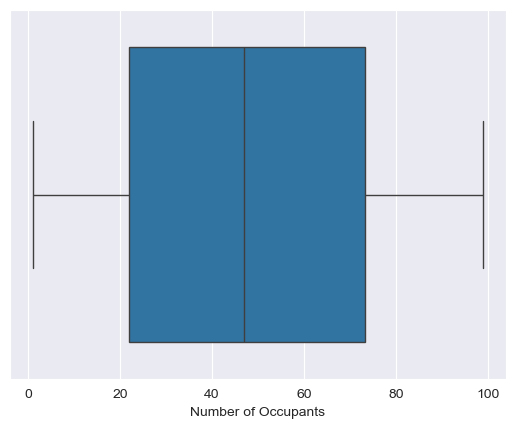

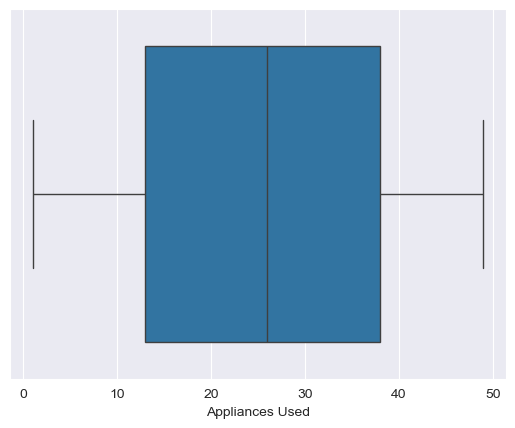

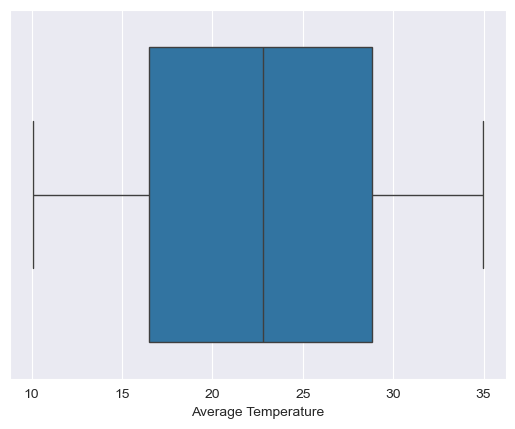

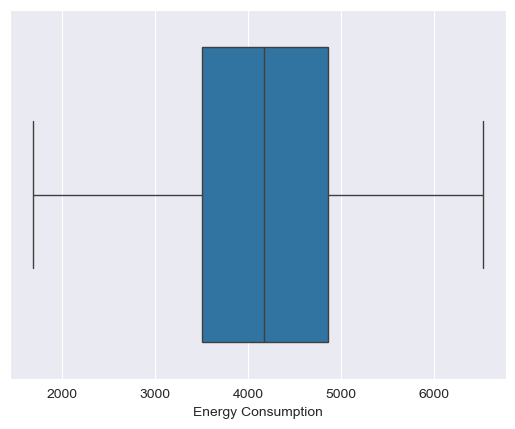

In [206]:
for col in df.columns:
    if df[col].dtype != "object":
        sns.boxplot(data=df, x=col)
        plt.show()

In [208]:
df.groupby("Building Type")["Number of Occupants"].sum().plot(kind="bar")

Building Type
Commercial     16088
Industrial     15723
Residential    16561
Name: Number of Occupants, dtype: int64

#### Feature Engineering

In [168]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [169]:
df["Occupant Load"] = df["Number of Occupants"] / df["Square Footage"]

In [170]:
df["Appliances per Person"] = df["Appliances Used"] / df["Number of Occupants"]

In [171]:
df["Temperature Category"] = df["Average Temperature"].apply(
    lambda x: "Cold" if x < 15 else ("Warm" if x < 25 else "Hot"))

In [172]:
df["Is Weekend"] = df["Day of Week"].apply(lambda x: 1 if x == "Weekend" else 0)
df.drop("Day of Week", axis=1, inplace=True)

#### Encoding

In [173]:
df = pd.get_dummies(df, columns=["Building Type", "Temperature Category"], drop_first=True)

In [174]:
df

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Occupant Load,Appliances per Person,Is Weekend,Building Type_Industrial,Building Type_Residential,Temperature Category_Hot,Temperature Category_Warm
0,7063,76,10,29.84,2713.95,0.010760,0.131579,0,False,True,True,False
1,44372,66,45,16.72,5744.99,0.001487,0.681818,0,False,False,False,True
2,19255,37,17,14.30,4101.24,0.001922,0.459459,1,True,False,False,False
3,13265,14,41,32.82,3009.14,0.001055,2.928571,0,False,True,True,False
4,13375,26,18,11.92,3279.17,0.001944,0.692308,0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,14419,68,44,23.95,3661.21,0.004716,0.647059,1,False,True,False,True
996,12194,7,22,14.67,3546.34,0.000574,3.142857,1,True,False,False,False
997,39562,88,20,32.18,5147.21,0.002224,0.227273,0,False,False,True,False
998,8348,67,37,16.48,3244.98,0.008026,0.552239,1,False,True,False,True


#### Scaling

In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in ["Square Footage","Number of Occupants","Appliances Used","Average Temperature","Energy Consumption"]:
    df[col] = scaler.fit_transform(df[[col]])

## 5. Feature Selection

#### Correlation Matrix

In [176]:
df.corr()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Occupant Load,Appliances per Person,Is Weekend,Building Type_Industrial,Building Type_Residential,Temperature Category_Hot,Temperature Category_Warm
Square Footage,1.000000,0.033379,-0.013478,0.027273,0.774873,-0.468161,-0.014195,0.011354,0.035415,0.018532,0.052532,-0.062038
Number of Occupants,0.033379,1.000000,0.023646,0.014122,0.354485,0.262283,-0.460714,0.014296,0.028786,-0.016206,0.003515,0.006303
Appliances Used,-0.013478,0.023646,1.000000,-0.062870,0.312792,0.014478,0.199820,-0.009046,0.014161,-0.028652,-0.035316,0.017543
Average Temperature,0.027273,0.014122,-0.062870,1.000000,-0.034487,-0.004459,-0.034107,-0.011106,0.015166,0.025854,0.846610,-0.314492
Energy Consumption,0.774873,0.354485,0.312792,-0.034487,1.000000,-0.280329,-0.078656,-0.004393,0.415468,-0.378708,0.005104,-0.039753
Occupant Load,-0.468161,0.262283,0.014478,-0.004459,-0.280329,1.000000,-0.128498,0.018803,-0.024397,0.005653,-0.019341,0.020552
Appliances per Person,-0.014195,-0.460714,0.199820,-0.034107,-0.078656,-0.128498,1.000000,-0.021066,0.013873,-0.038988,-0.035020,0.019407
Is Weekend,0.011354,0.014296,-0.009046,-0.011106,-0.004393,0.018803,-0.021066,1.000000,0.015987,-0.029712,-0.006847,0.003701
Building Type_Industrial,0.035415,0.028786,0.014161,0.015166,0.415468,-0.024397,0.013873,0.015987,1.000000,-0.496624,0.014235,-0.012523
Building Type_Residential,0.018532,-0.016206,-0.028652,0.025854,-0.378708,0.005653,-0.038988,-0.029712,-0.496624,1.000000,-0.012168,0.032597


#### Heatmap

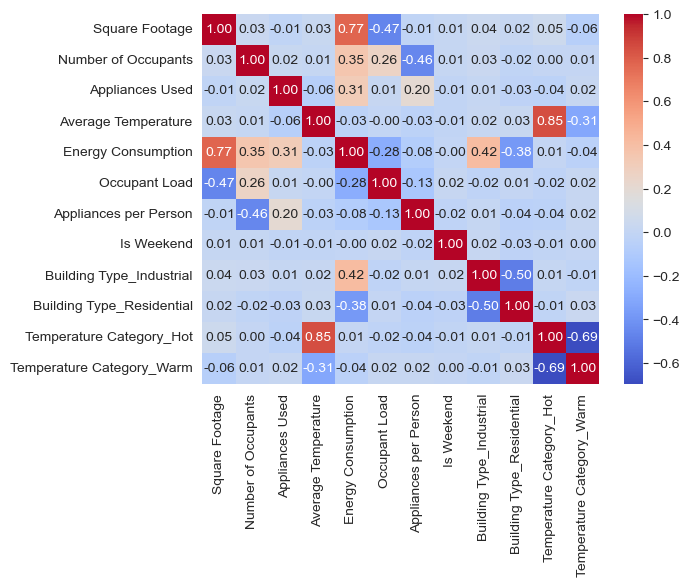

In [177]:
sns.heatmap(df.corr(), cmap="coolwarm",annot=True,fmt=".2f")
plt.show()

## 6. Splitting the Data

In [178]:
from sklearn.model_selection import train_test_split
X = df.drop("Energy Consumption", axis=1)
y = df["Energy Consumption"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Model Training